# Games (EDA)


The following notebook shows an exploratory data analysis using the data from the games file (after subjecting such file to some transformations and a cleaning process). 

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from etl_functions import general_information

In [7]:
df=pd.read_csv("cleaned_data/games_cleaned.csv")

C:\Users\diego\AppData\Local\Temp\ipykernel_34136\1531463081.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("cleaned_data/games_cleaned.csv")


In [8]:
df.head(5)

,publisher,genres,app_name,release_year,tags,specs,price,early_access,item_id,developer
0,Kotoshiro,Action,Lost Summoner Kitty,2018,Strategy,Single-player,4.99,0,761140,Kotoshiro
1,Kotoshiro,Action,Lost Summoner Kitty,2018,Action,Single-player,4.99,0,761140,Kotoshiro
2,Kotoshiro,Action,Lost Summoner Kitty,2018,Indie,Single-player,4.99,0,761140,Kotoshiro
3,Kotoshiro,Action,Lost Summoner Kitty,2018,Casual,Single-player,4.99,0,761140,Kotoshiro
4,Kotoshiro,Action,Lost Summoner Kitty,2018,Simulation,Single-player,4.99,0,761140,Kotoshiro


In [9]:
general_information(df)

,column,data_type,missing_values,missing_values_percentage
0,publisher,<class 'str'>,973,0.0
1,genres,<class 'str'>,0,0.0
2,app_name,<class 'str'>,0,0.0
3,release_year,<class 'str'>,0,0.0
4,tags,<class 'str'>,0,0.0
5,specs,<class 'str'>,0,0.0
6,price,<class 'str'>,820,0.0
7,early_access,<class 'str'>,0,0.0
8,item_id,<class 'str'>,0,0.0
9,developer,<class 'str'>,0,0.0


In [14]:
df_copy=df.copy()

In [15]:
df_copy.drop_duplicates(subset="app_name",keep="first",inplace=True,ignore_index=True)

In [16]:
#Top genres
df_genres=df_copy["genres"].value_counts().reset_index()

In [17]:
df_genres

,genres,count
0,Action,9421
1,Adventure,3779
2,Casual,2770
3,Indie,2104
4,Simulation,1634
5,Strategy,1016
6,RPG,580
7,Racing,401
8,Free to Play,377
9,Design &amp; Illustration,201


In [18]:
df_genres.sort_values(by="count",ascending=True,inplace=True)

In [19]:
df_genres

,genres,count
18,Early Access,2
16,Photo Editing,2
17,Web Publishing,2
15,Education,3
14,Utilities,24
13,Audio Production,26
12,Massively Multiplayer,35
11,Sports,56
10,Animation &amp; Modeling,80
9,Design &amp; Illustration,201


C:\Users\diego\AppData\Local\Temp\ipykernel_34136\1219798531.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


Text(0.5, 1.0, 'Games genres')

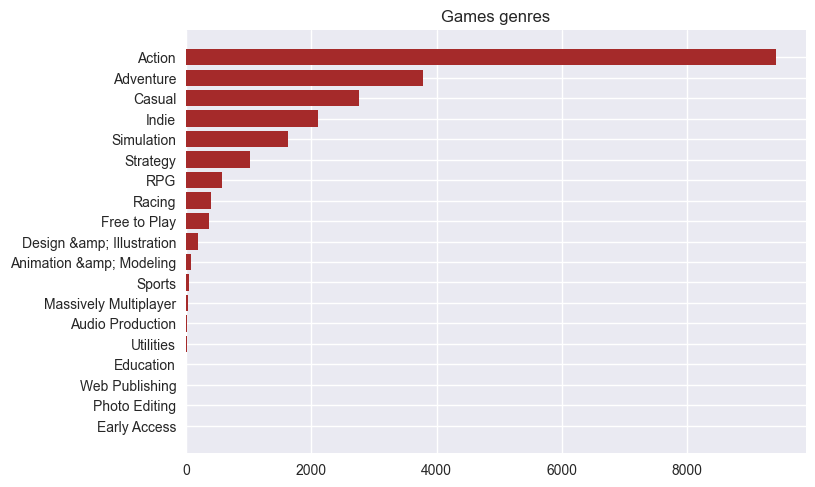

In [20]:
plt.style.use("seaborn")
plt.barh(df_genres["genres"],df_genres["count"],color="brown")
plt.title("Games genres")

In [21]:
#Top 10 years
df_year=df_copy["release_year"].value_counts().reset_index()

In [22]:
df_year.head(5)

,release_year,count
0,2017,4672
1,2016,2960
2,2017,2561
3,2016,2141
4,2015,1827


In [23]:
df_tp10=df_year.loc[:9,:]

In [24]:
df_tp10.head(5)

,release_year,count
0,2017,4672
1,2016,2960
2,2017,2561
3,2016,2141
4,2015,1827


In [25]:
df_tp10.sort_values(by="count",ascending=True,inplace=True,ignore_index=True)

C:\Users\diego\AppData\Local\Temp\ipykernel_34136\3945581837.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tp10.sort_values(by="count",ascending=True,inplace=True,ignore_index=True)


In [26]:
df_tp10

,release_year,count
0,2011,490
1,2013,976
2,2012,1049
3,2014,1528
4,2015,1675
5,2015,1827
6,2016,2141
7,2017,2561
8,2016,2960
9,2017,4672


C:\Users\diego\AppData\Local\Temp\ipykernel_34136\858327409.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


Text(0.5, 1.0, 'Top 10 years')

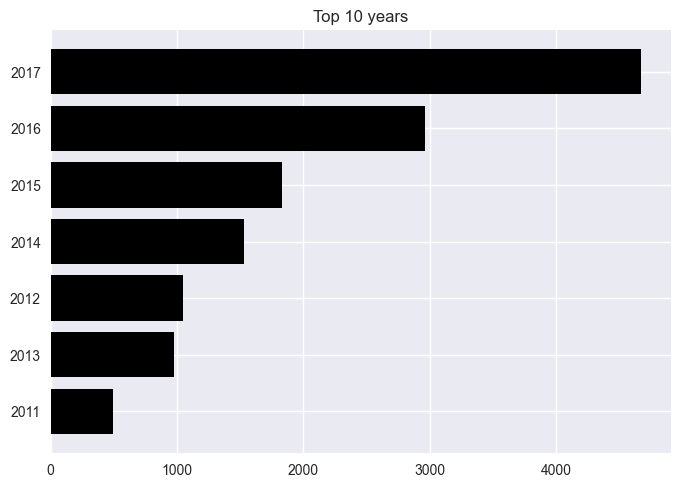

In [28]:
plt.style.use("seaborn")
plt.barh(df_tp10["release_year"].apply(str),df_tp10["count"],color="black")
plt.title("Top 10 years")

In [29]:
df_dev=df_copy["developer"].value_counts().reset_index()

In [30]:
df_dev.head(5)

,developer,count
0,Dovetail Games,253
1,"KOEI TECMO GAMES CO., LTD.",180
2,Ubisoft - San Francisco,178
3,Capcom,107
4,Paradox Development Studio,97


In [31]:
df_tp10_dev=df_dev.loc[0:9,:]

In [32]:
df_tp10_dev

,developer,count
0,Dovetail Games,253
1,"KOEI TECMO GAMES CO., LTD.",180
2,Ubisoft - San Francisco,178
3,Capcom,107
4,Paradox Development Studio,97
5,Stainless Games,83
6,DL Softworks,78
7,"Relic Entertainment,Feral Interactive (Mac),Fe...",77
8,Choice of Games,76
9,SCS Software,73


In [33]:
df_tp10_dev.sort_values(by="count",inplace=True,ascending=True)

C:\Users\diego\AppData\Local\Temp\ipykernel_34136\485333504.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tp10_dev.sort_values(by="count",inplace=True,ascending=True)


C:\Users\diego\AppData\Local\Temp\ipykernel_34136\1131310136.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


Text(0.5, 1.0, 'Top 10 developers')

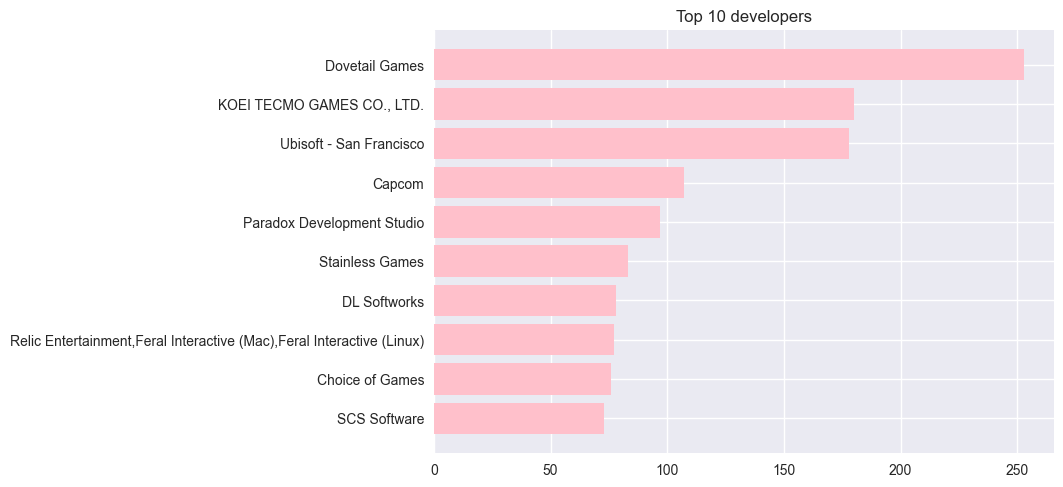

In [34]:
plt.style.use("seaborn")
plt.barh(df_tp10_dev["developer"],df_tp10_dev["count"],color="pink")
plt.title("Top 10 developers")

In [35]:
df_pub=df_copy["publisher"].value_counts().reset_index()

In [36]:
df_top10_pub=df_pub.loc[0:9,:]

In [37]:
df_top10_pub.sort_values(by="count",ascending=True,inplace=True)

C:\Users\diego\AppData\Local\Temp\ipykernel_34136\92529627.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top10_pub.sort_values(by="count",ascending=True,inplace=True)


In [38]:
df_top10_pub

,publisher,count
9,KISS ltd,177
8,"KOEI TECMO GAMES CO., LTD.",192
7,Big Fish Games,194
6,Activision,201
5,SEGA,215
4,Dovetail Games - Flight,220
3,Paradox Interactive,262
2,Degica,266
1,Dovetail Games - Trains,358
0,Ubisoft,366


C:\Users\diego\AppData\Local\Temp\ipykernel_34136\3309337322.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


Text(0.5, 1.0, 'Top 10 publishers')

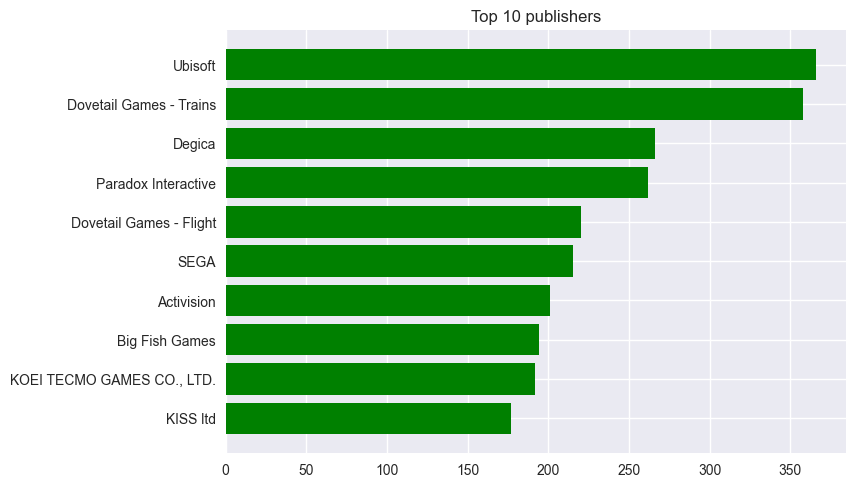

In [39]:
plt.style.use("seaborn")
plt.barh(df_top10_pub["publisher"],df_top10_pub["count"],color="green")
plt.title("Top 10 publishers")